In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from tqdm import tqdm
from torchinfo import summary
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [2]:
in_channels = 3
num_classes = 10
batch_size = 1024
learning_rate = 1e-3
num_epochs = 10

In [4]:
train_dataset = datasets.CIFAR10(root = "datasets/", download = True, transform = transforms.ToTensor(), train = True)
test_dataset = datasets.CIFAR10(root = "datasets/", download = True, train = False, transform = transforms.ToTensor())
train_loader = DataLoader(train_dataset, shuffle = True, batch_size = batch_size)
test_loader = DataLoader(test_dataset, shuffle = True, batch_size = batch_size)

100%|██████████| 170498071/170498071 [00:14<00:00, 11561006.71it/s]


Extracting datasets/cifar-10-python.tar.gz to datasets/
Files already downloaded and verified


In [26]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
    
    def forward(self, input_tensor):
        return input_tensor

model = torchvision.models.vgg16(pretrained = True)
for params in model.parameters():
    params.requires_grad = False
model.avgpool = Identity()
model.classifier = nn.Sequential(

    # nn.Flatten(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 100),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(100, 10)
    # nn.Linear(512, 100),
    # nn.ReLU(),
    # nn.Linear(100, 10)
)

model.to(device)
print(model)
print()
print(summary(model, input_size = (batch_size, 3, 32, 32)))

c:\Users\Nogi2\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Nogi2\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\Nogi2/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [00:14<00:00, 37.7MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [19]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

print(loss_fn)
print()
print(optimizer)

CrossEntropyLoss()

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


In [27]:
# Training Loop
total_loss = 0
correct = 0
losses = []
accuracies = []

model.train()
for epoch in tqdm(range(num_epochs)):
    total_loss = 0
    correct = 0
    for batch_idx, (x, y) in enumerate(train_loader):
        x, y = x.to(device), y.to(device)
        y_pred = model(x)
        loss_batch = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss_batch.backward()
        optimizer.step()

        total_loss += loss_batch.item()
        correct += (y_pred.argmax(1) == y).sum().item()

    losses.append(total_loss/len(train_loader.dataset))
    accuracies.append(correct/len(train_loader.dataset))
    print(f"Epoch: {epoch} | Loss: {total_loss/len(train_loader.dataset):.3f} | Accuracy: {(correct/len(train_loader.dataset) * 100):.3f}")

 10%|█         | 1/10 [00:19<02:59, 19.90s/it]

Epoch: 0 | Loss: 0.002 | Accuracy: 10.112


 20%|██        | 2/10 [00:42<02:53, 21.73s/it]

Epoch: 1 | Loss: 0.002 | Accuracy: 10.186


 30%|███       | 3/10 [01:09<02:48, 24.10s/it]

Epoch: 2 | Loss: 0.002 | Accuracy: 10.444


 40%|████      | 4/10 [01:32<02:21, 23.50s/it]

Epoch: 3 | Loss: 0.002 | Accuracy: 10.194


 50%|█████     | 5/10 [01:54<01:55, 23.06s/it]

Epoch: 4 | Loss: 0.002 | Accuracy: 10.176


 60%|██████    | 6/10 [02:14<01:28, 22.02s/it]

Epoch: 5 | Loss: 0.002 | Accuracy: 9.982


 70%|███████   | 7/10 [02:35<01:04, 21.61s/it]

Epoch: 6 | Loss: 0.002 | Accuracy: 10.062


 80%|████████  | 8/10 [02:58<00:43, 21.98s/it]

Epoch: 7 | Loss: 0.002 | Accuracy: 10.102


 90%|█████████ | 9/10 [03:18<00:21, 21.41s/it]

Epoch: 8 | Loss: 0.002 | Accuracy: 10.126


100%|██████████| 10/10 [03:39<00:00, 21.92s/it]

Epoch: 9 | Loss: 0.002 | Accuracy: 9.938


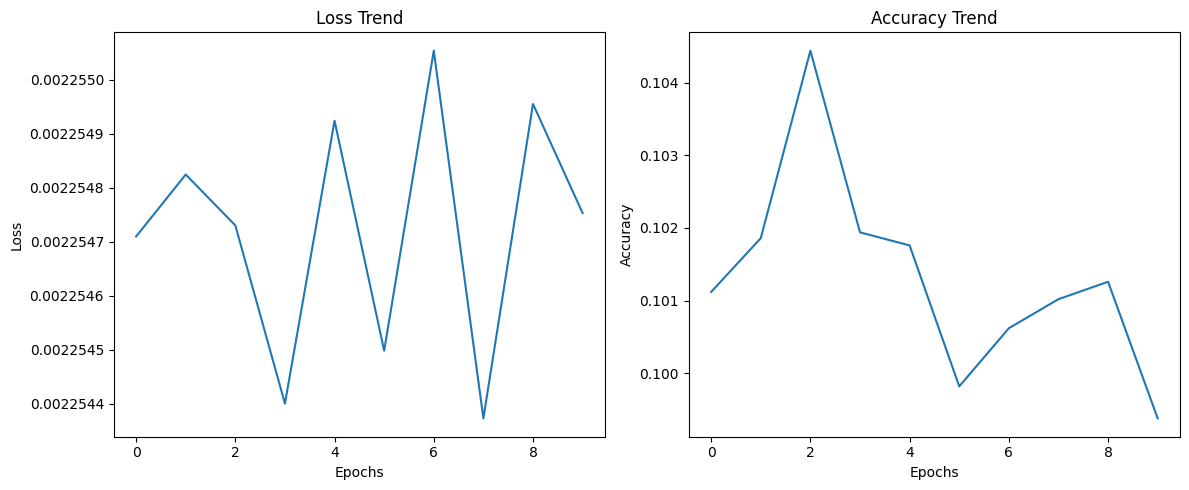

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 5))
ax1.plot(range(num_epochs), losses)
ax1.set_title("Loss Trend")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")

ax2.plot(range(num_epochs), accuracies)
ax2.set_title("Accuracy Trend")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")

plt.tight_layout()
plt.show()

In [29]:
# Testing Loop
total_loss = 0
correct = 0

model.eval()
with torch.no_grad():
    for batch_idx, (x, y) in enumerate(test_loader):
        x, y = x.to(device), y.to(device)
        y_pred = model(x)
        loss_batch = loss_fn(y_pred, y)

        total_loss += loss_batch.item()
        correct += (y_pred.argmax(1) == y).sum().item()

print(f"Loss: {total_loss/len(test_loader.dataset):.3f} | Accuracy: {(correct/len(test_loader.dataset) * 100):.3f}")

Loss: 0.002 | Accuracy: 10.090
